Лабораторна робота № 2. Формат HDF5.

В цій лабораторній роботі побудуємо за даними детектора гравітаційних хвиль
LIGO графік злиття двох нейтронних зір. Подія GW170817 https://uk.wikipedia.org/wiki/GW170817. 
Лабораторну роботу створено на основі https://losc.ligo.org/tutorial00/
1. Завантажте файл з даними за посиланням
https://dcc.ligo.org/public/0146/P1700337/001/H-H1_LOSC_C00_4_V1-1187006834-4096.hdf5
2. Виведіть зміст файлу командою.

In [1]:
#----------------------
# Import needed modules
#----------------------
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
fileName = 'H-H1_LOSC_C00_4_V1-1187006834-4096.hdf5'
dataFile = h5py.File(fileName, 'r')

In [3]:
#----------------------
# Explore the file
#----------------------
for key in dataFile.keys():
    print (key)

meta
quality
strain


4. Зчитайте результати вимірів. Для цього зчитайте name Strain з групи strain в змінну strain. 
5. Також з «strain/Strain» зчитайте атрибут Xspacing в змінну st та виведіть її. Це інтервал часу між вимірами.

In [4]:
#---------------------
# Read in strain data
#---------------------
strain = dataFile['strain']['Strain'].value
strain

<ipython-input-4-12382788e92f>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  strain = dataFile['strain']['Strain'].value


array([-2.39164589e-18, -2.41165983e-18, -2.42738194e-18, ...,
       -1.44620127e-18, -1.43820069e-18, -1.44157492e-18])

In [5]:
ts = dataFile['strain']['Strain'].attrs['Xspacing']
ts

0.000244140625

In [6]:
#-----------------------
# Print out some meta data
#-----------------------

metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    print (key, meta[key].value)

Description b'Strain data time series from LIGO'
DescriptionURL b'http://losc.ligo.org/'
Detector b'H1'
Duration 4096
GPSstart 1187006834
Observatory b'H'
Type b'StrainTimeSeries'
UTCstart b'2017-08-17T12:06:56'


<ipython-input-6-97fb821040c6>:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  print (key, meta[key].value)


6. Знайдіть час початку події та її тривалість. Для цього з групи meta зчитайте в змінну gpsStart name GPSstart та в змінну duration name Duration.
7. Знайдіть час закінчення події та збережіть його в змінну gpsEnd.
8. Створіть вектор з часу вимірів і збережіть у змінну myTime. Початок послідовності – gpsStart, кінець – gpsEnd, крок – st.

In [7]:
#---------------------------
# Create a time vector
#---------------------------
gpsStart = meta['GPSstart'].value
duration = meta['Duration'].value
gpsEnd   = gpsStart + duration

time = np.arange(gpsStart, gpsEnd, ts)

<ipython-input-7-979ba032257c>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  gpsStart = meta['GPSstart'].value
<ipython-input-7-979ba032257c>:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  duration = meta['Duration'].value


9. Побудуємо графік тільки для першого мільйону вимірів. Для цього створіть змінну numSamples, яка дорівнює 1000000.
10.Побудуйте графік за допомогою функції plot(myTime[0:numSamples], strain[0:numSamples], type = "l", xlab = "GPS Time (s)", ylab = "H1 Strain")

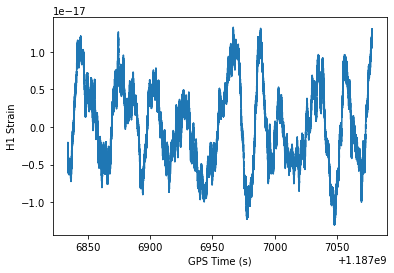

In [8]:
#----------------------
# Plot the time series
#----------------------
numSamples = 1000000
plt.plot(time[0:numSamples], strain[0:numSamples])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()